In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## This dataset is related to different types of wines and its constituents. The first column indicates the type of Wine. ##
## The remaining columns indicate the percentage of the various constituents present in the wine.##

In [6]:
df['Type'].unique()

array([1, 2, 3], dtype=int64)

### There are three types of wines as per above ##

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

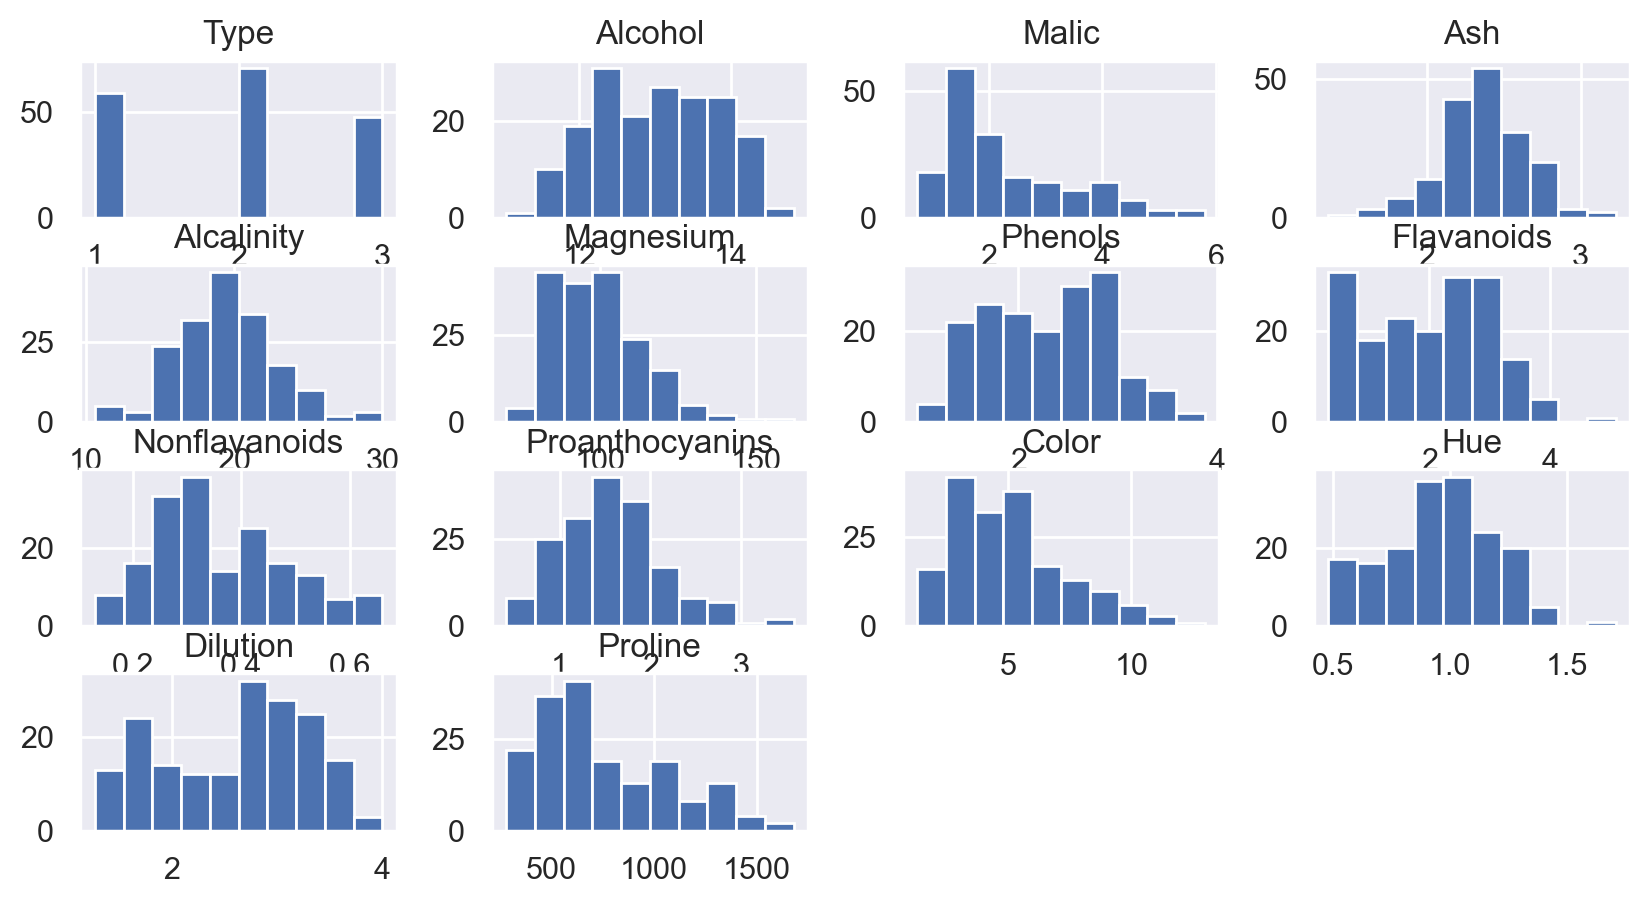

In [8]:
df.hist()

<Axes: >

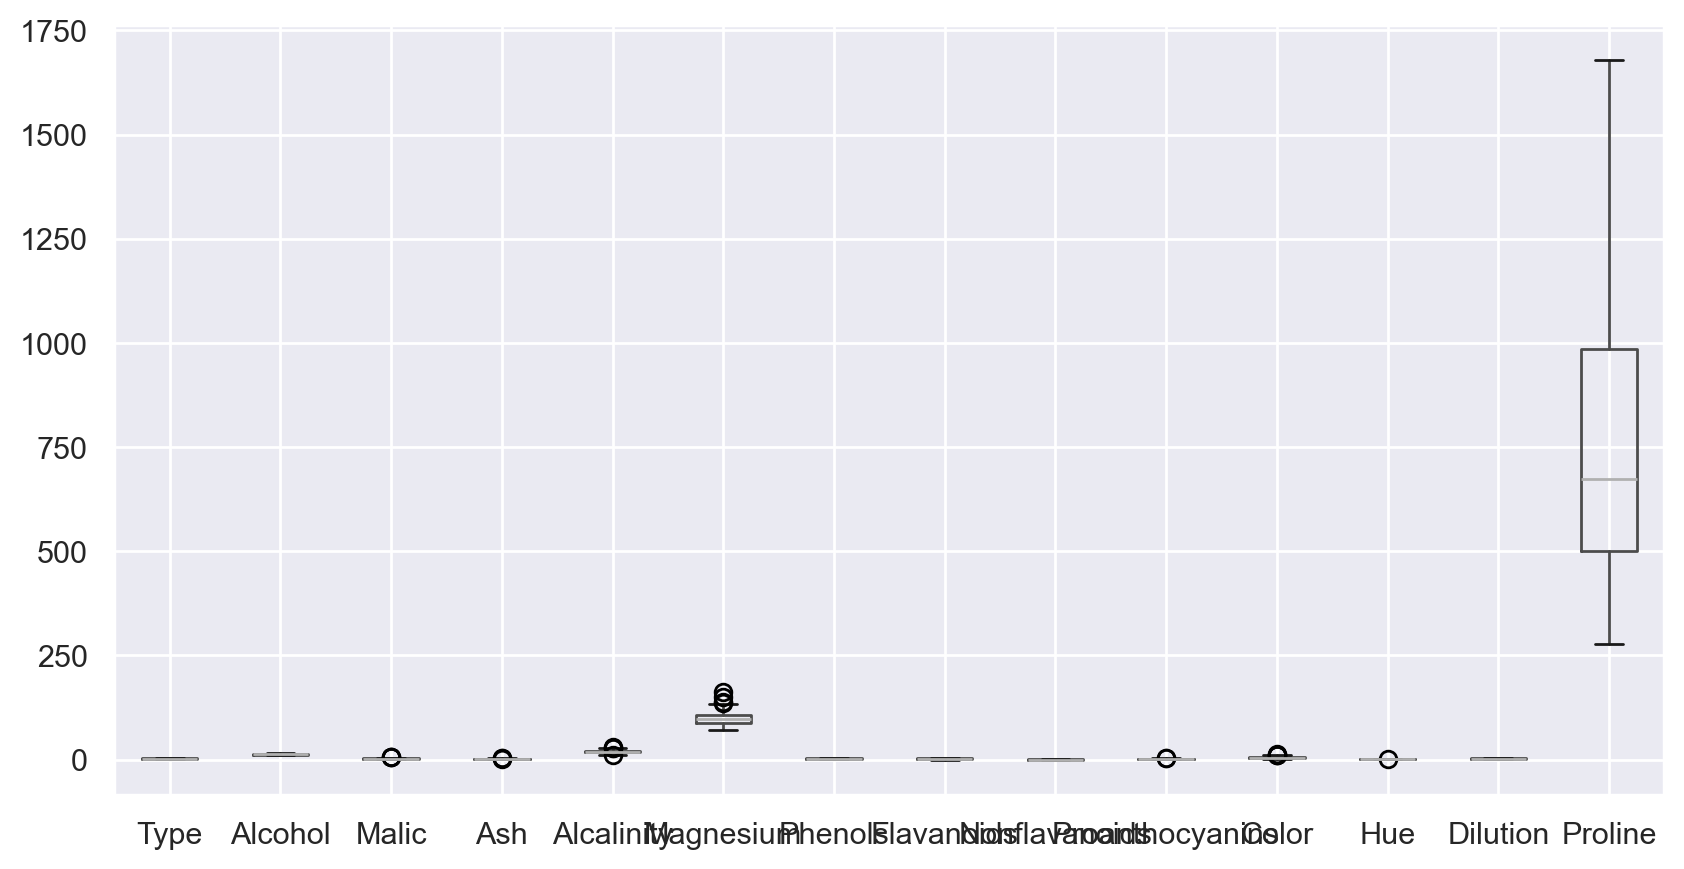

In [9]:
df.boxplot()

In [10]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<Axes: >

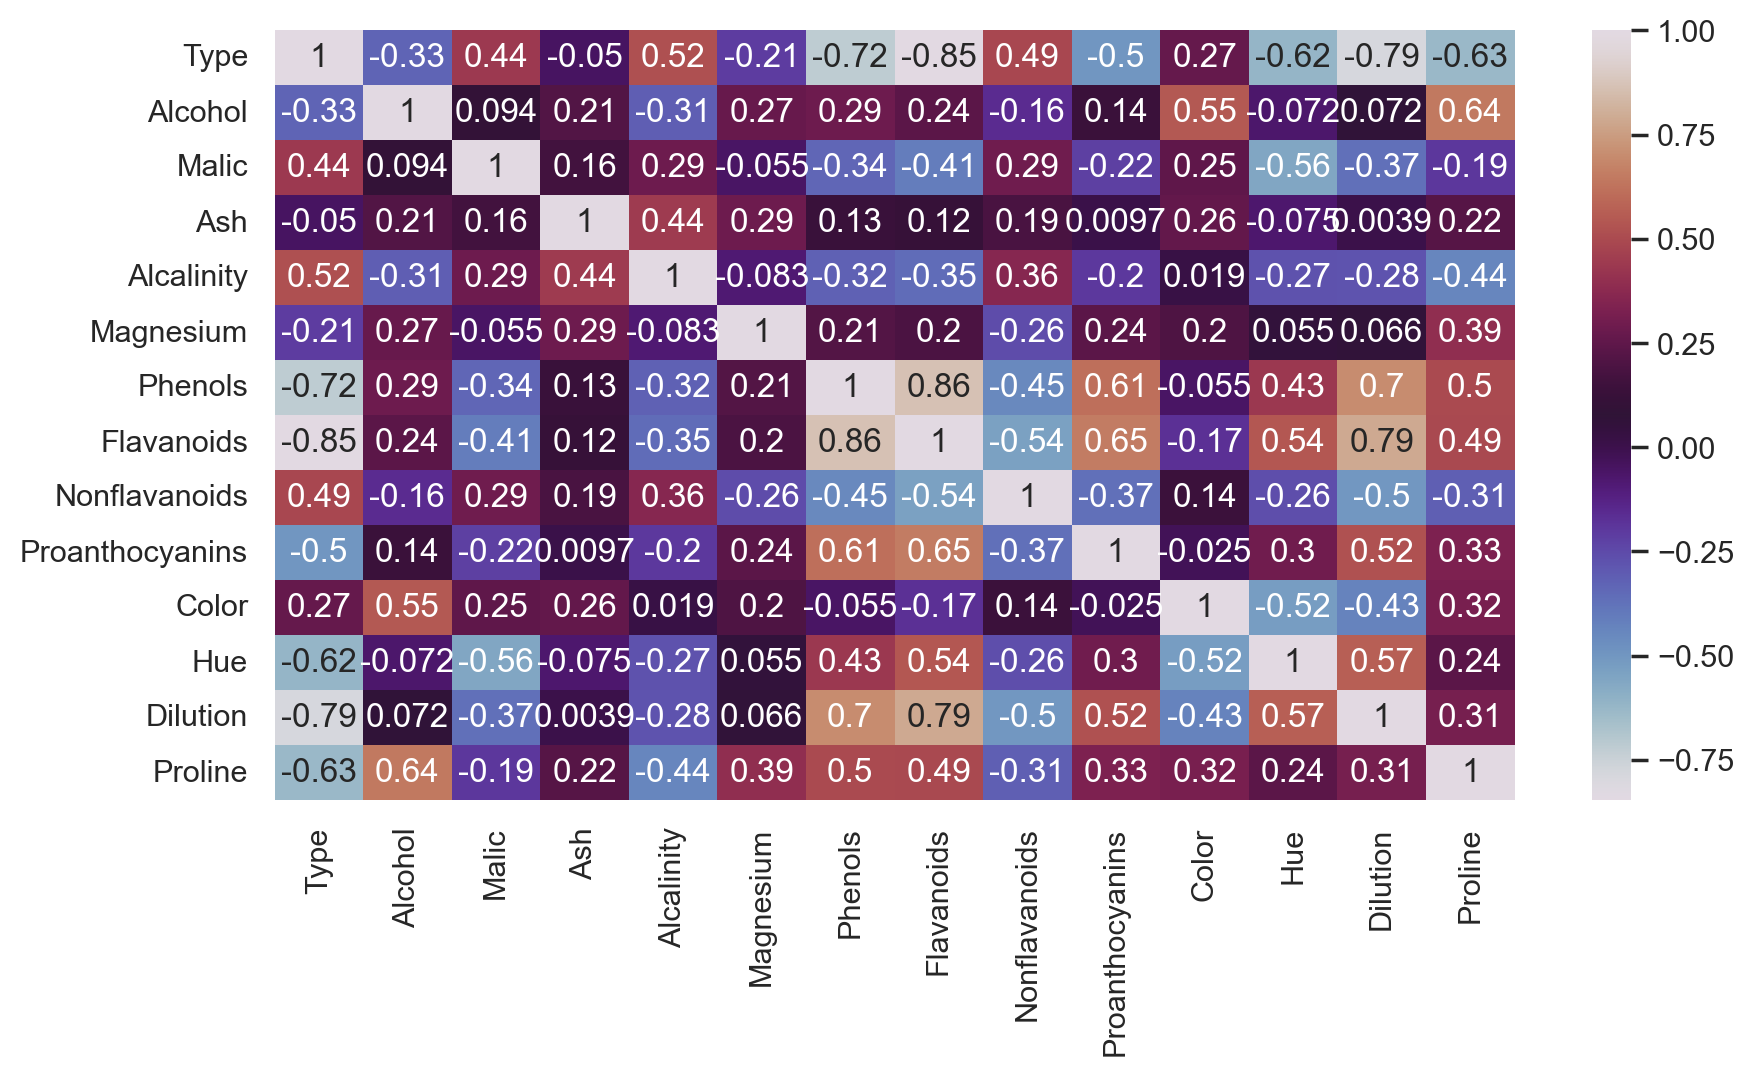

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap='twilight')

## As per above heatmap of correlations we can see that Alcalinity has a strong correlation with the type of wine 0.52 ##
## wheras Flavanoids has the weakest correlation with type of wine. Colour of the wine also has strong correlation with Alcohol 0.55 ##

In [78]:
x = df.iloc[:,1:]
y = df.iloc[:, [0]]

In [14]:
x

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [15]:
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [80]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [82]:
km = KMeans()
yp = km.fit_predict(x)
yp

C:\Users\SANKET NICHAT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 4, 7, 2, 7, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 7, 7, 7, 2, 4, 4, 5,
       4, 4, 4, 7, 4, 4, 7, 4, 7, 2, 4, 7, 7, 4, 7, 4, 4, 4, 4, 4, 4, 5,
       4, 4, 4, 4, 2, 2, 2, 4, 2, 7, 4, 7, 2, 4, 2, 1, 6, 6, 1, 1, 3, 3,
       1, 1, 6, 1, 6, 7, 3, 7, 1, 1, 1, 3, 1, 5, 1, 1, 3, 6, 5, 1, 3, 3,
       3, 3, 3, 3, 3, 5, 1, 7, 3, 1, 1, 5, 1, 1, 5, 1, 1, 3, 1, 3, 1, 5,
       5, 5, 3, 3, 3, 3, 1, 3, 6, 5, 5, 7, 3, 5, 5, 5, 5, 3, 3, 3, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 0, 0, 0, 6, 6, 6, 0, 6, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       0, 0])

In [18]:
silhouette_score(x,yp)

0.1454570072641733

In [19]:
km.cluster_centers_

array([[ 1.14912299, -0.39935034, -0.07650124, -1.11041937,  0.42290428,
         1.04039292,  1.09771452, -0.81834929,  0.80953698,  0.39751838,
         0.38153318,  0.87001063,  1.30729361],
       [-1.10323735, -0.48146012,  0.21682195,  0.68466665, -0.43531614,
        -0.60439256, -0.32848419,  0.83113101, -0.35491187, -1.00976536,
         0.59726551, -0.07241414, -0.73965681],
       [-0.02917446, -0.21126351, -0.06768541,  0.31081184, -0.192495  ,
        -0.59144038, -1.21005063,  1.58856478, -0.28015628,  1.61301454,
        -1.31378611, -1.3639754 , -0.28308002],
       [ 0.05426207,  1.45749228,  0.12903839,  0.45877044, -0.49249746,
        -1.03514055, -1.32632823,  1.09484102, -1.08149585,  0.12981076,
        -0.94205887, -1.0276856 , -0.47762364],
       [ 0.54176501, -0.29366899,  1.16343341,  0.14925851,  0.66691629,
         0.77054144,  0.88101126, -0.24700344,  0.25773354, -0.05385059,
         0.68508541,  0.73095979,  0.88244468],
       [-0.77249515, -0.269162

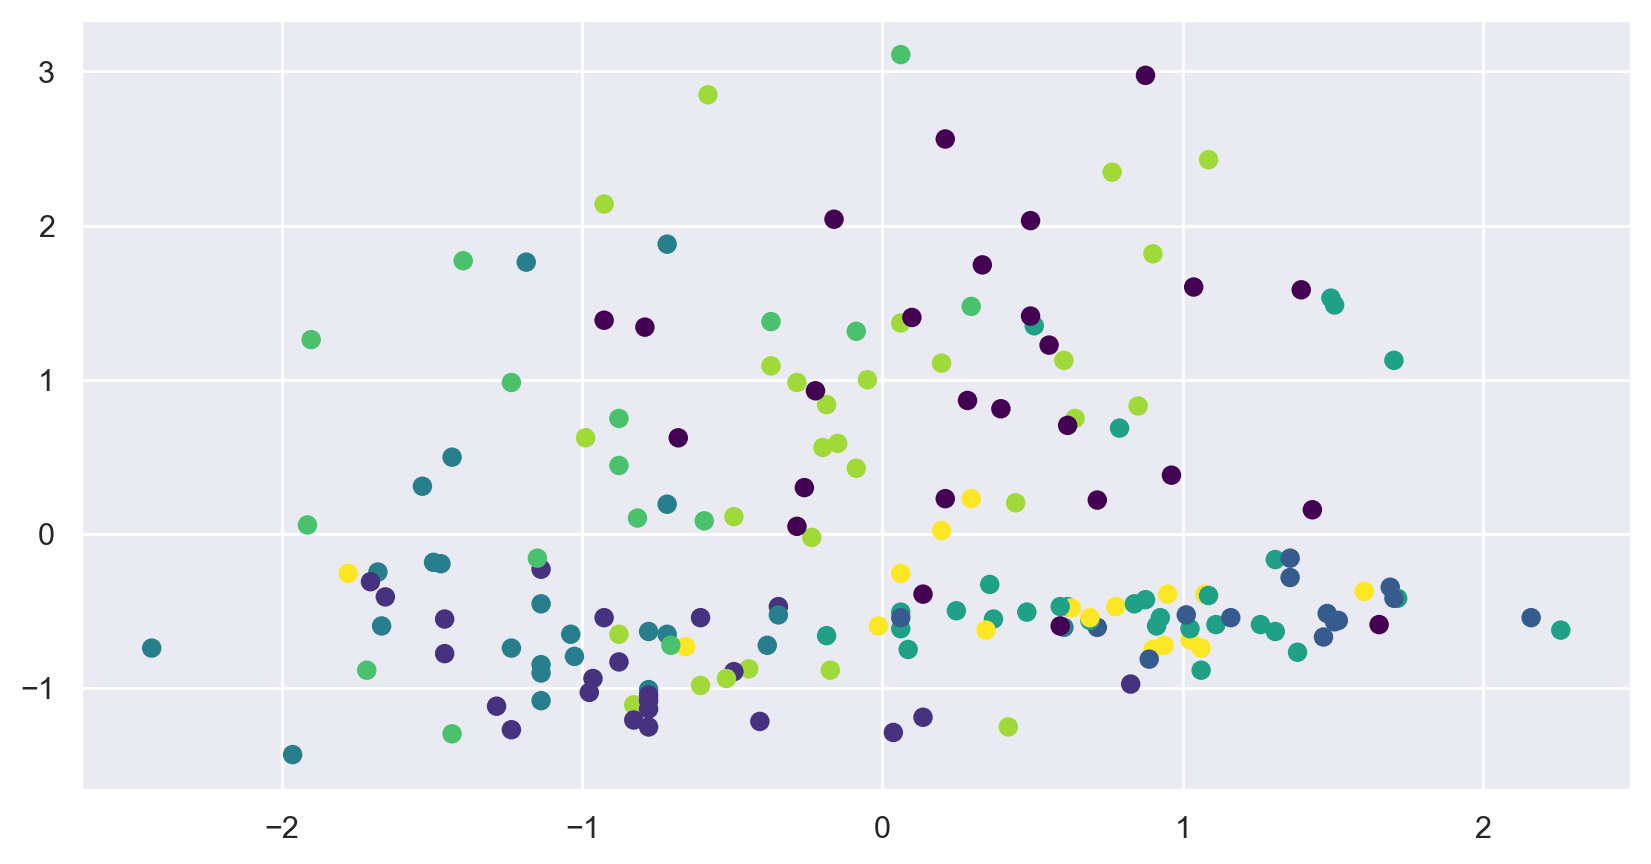

In [84]:
plt.scatter(x[:,0],x[:,1], c = yp, cmap='viridis')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 100)

## From the above scatterplot we can see no distinct clusters can be found out based on the given dataset.##

In [86]:
# !pip install threadpoolctl==3.1.0

## As there are three distinct values in the column 'Type' I assumed the number of cluesters to be 3 for K-Means clustering##

In [91]:
km = KMeans(n_clusters=3)
ypred = km.fit_predict(x)
ypred

C:\Users\SANKET NICHAT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [93]:
silhouette_score(x,ypred)

0.2806817957373884

In [95]:
pca = PCA()
pcs = pca.fit_transform(x)

In [26]:
pcs

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [97]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,0.958416,0.146097,0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,0.146894,0.552427,0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,0.679235,-0.047024,-0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,0.633975,-0.390829,-0.057448,0.491490,0.299822,0.339821,-0.021866


In [99]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [101]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

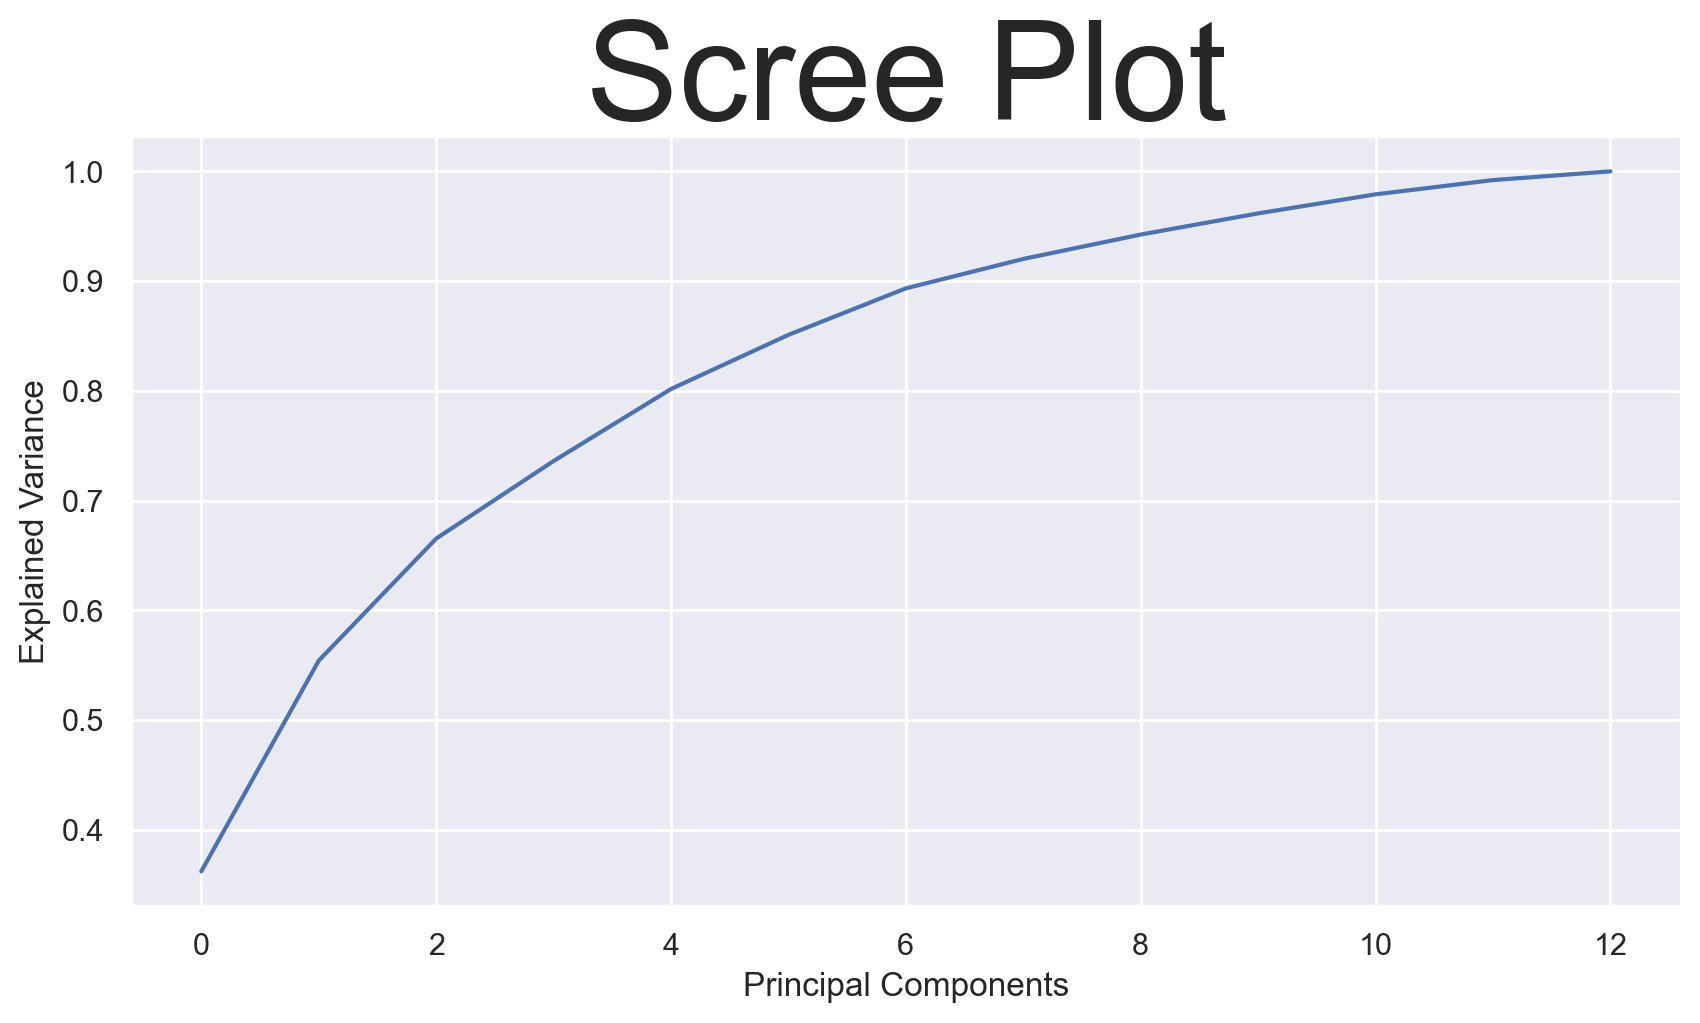

In [103]:
# plt.figure(figsize=(5,3),dpi=200)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 50)

In [127]:
pca = PCA(n_components=6)
pcs = pca.fit_transform(x)
pcs

array([[ 3.31675081,  1.44346263, -0.16573904, -0.21563119,  0.69304284,
         0.22388013],
       [ 2.20946492, -0.33339289, -2.02645737, -0.29135832, -0.25765463,
         0.92712024],
       [ 2.51674015,  1.0311513 ,  0.98281867,  0.72490231, -0.25103312,
        -0.54927605],
       ...,
       [-2.67783946,  2.76089913, -0.94094188,  0.31203475,  1.271355  ,
        -0.27306792],
       [-2.38701709,  2.29734668, -0.5506962 , -0.68828455,  0.81395522,
        -1.17878298],
       [-3.20875816,  2.76891957,  1.01391366,  0.59690319, -0.89519259,
        -0.29609218]])

In [115]:
data = pd.DataFrame(pcs,columns=['C1','C2','C3','C4','C5','C6'])
data

,C1,C2,C3,C4,C5,C6
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520
...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783


In [117]:
data['Type'] = y
data

,C1,C2,C3,C4,C5,C6,Type
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,1
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,1
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,1
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,1
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,1
...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,3
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,3
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,3
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,3


In [119]:
x = data.iloc[:,:-1]
y = data['Type']

In [121]:
km = KMeans()
yp = km.fit_predict(x)
yp

C:\Users\SANKET NICHAT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 0, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 3, 3, 3, 3, 0, 3, 0,
       0, 0, 3, 7, 3, 2, 3, 2, 0, 3, 0, 3, 7, 0, 0, 0, 3, 5, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 7, 7, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 2, 3, 0, 0, 0, 0, 3, 3, 3, 6, 6,
       6, 6, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 1, 6, 6, 6, 6, 1,
       1, 5, 1, 5, 1, 1, 5, 5, 5, 6, 1, 5, 1, 1, 1, 6, 6, 1, 1, 5, 5, 6,
       1, 5])

In [123]:
silhouette_score(x,yp)

0.19679360810500707

<Axes: xlabel='C1', ylabel='C2'>

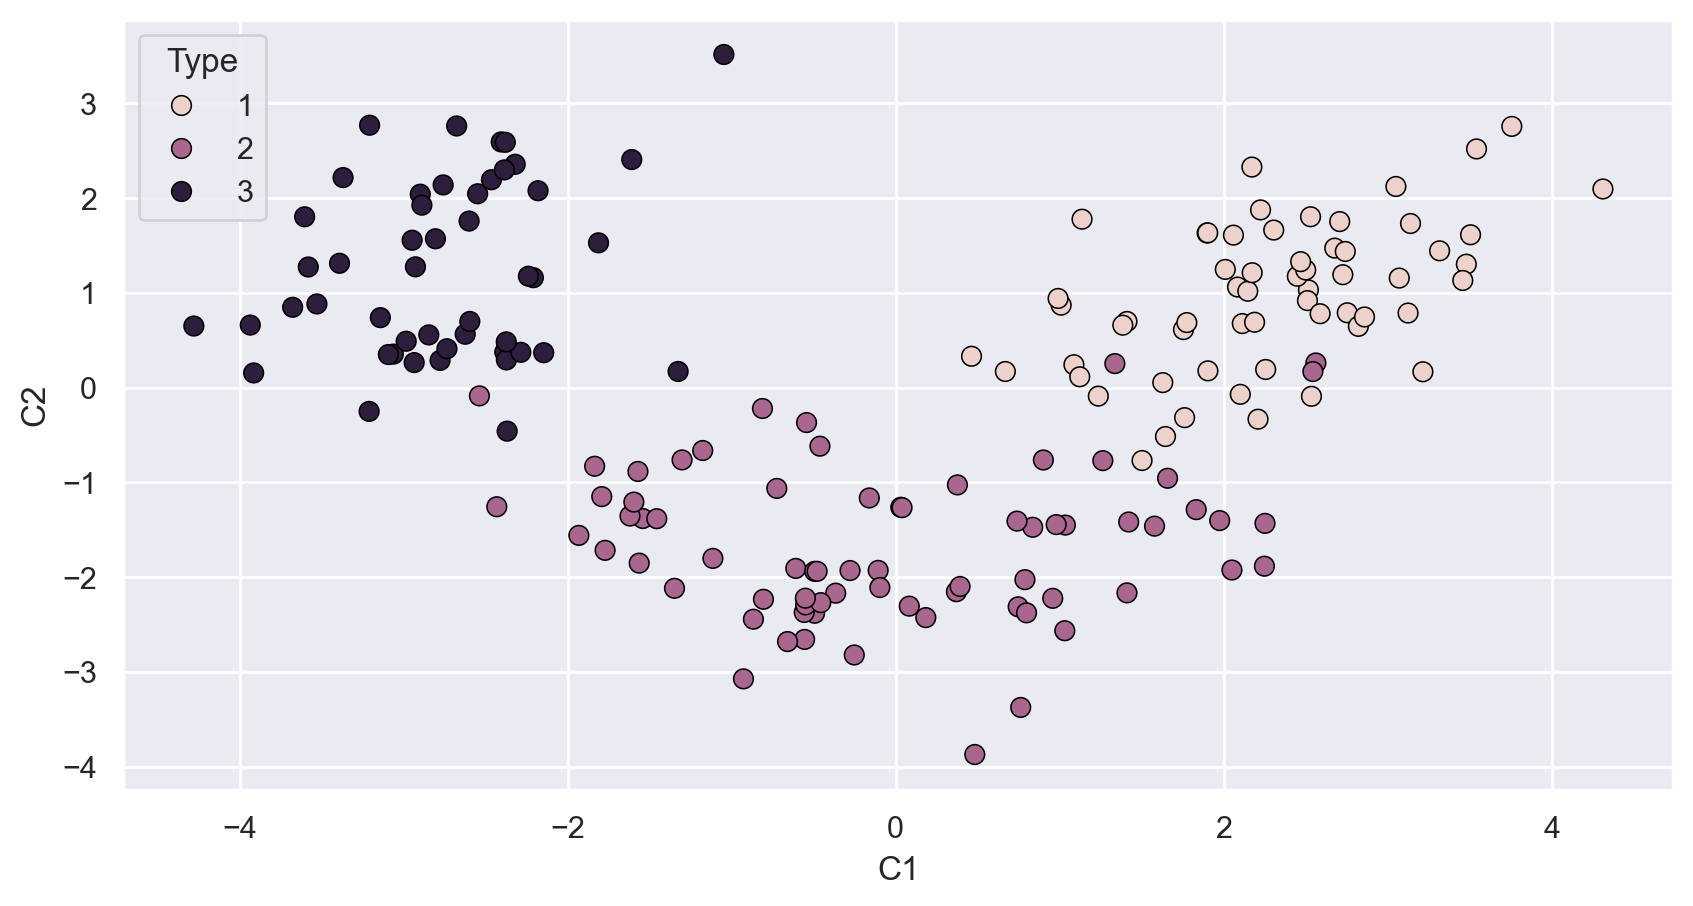

In [129]:
sns.scatterplot(x = data['C1'], y = data['C2'],s = 50, edgecolor = 'black',hue=data['Type'])

## We can see that the Silhoutte score is reduced further when I considered 6 components however while plotting the above graph ##
## I used only 2 Principal Components and we get 3 distinct clusters hence I am going to try with 2 components and see what is the Silhoutte score##

In [132]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)
pcs

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

In [134]:
data = pd.DataFrame(pcs,columns=['C1','C2'])
data

,C1,C2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831
...,...,...
173,-3.370524,2.216289
174,-2.601956,1.757229
175,-2.677839,2.760899
176,-2.387017,2.297347


In [136]:
data['Type'] = y
data

,C1,C2,Type
0,3.316751,1.443463,1
1,2.209465,-0.333393,1
2,2.516740,1.031151,1
3,3.757066,2.756372,1
4,1.008908,0.869831,1
...,...,...,...
173,-3.370524,2.216289,3
174,-2.601956,1.757229,3
175,-2.677839,2.760899,3
176,-2.387017,2.297347,3


In [138]:
x = data.iloc[:,:-1]
y = data['Type']

In [146]:
km = KMeans()
yp = km.fit_predict(x)


C:\Users\SANKET NICHAT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [150]:
silhouette_score(x,yp)

0.4055289666710389

## After using 2 Principal components the Silhoutte score is increased to 0.41 and we get 3 realtively distinct clusters.##